## **Brain Tumor Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.listdir('/content/drive/My Drive/CNN/archive (4)/')

['pred', 'no', 'yes', 'Br35H-Mask-RCNN']

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
import cv2

## Load the Data

In [4]:
image_dir='/content/drive/My Drive/CNN/archive (4)/'
no_tumor_images=os.listdir(image_dir+ '/no')
yes_tumor_images=os.listdir(image_dir+ '/yes')
print('The length of no tumor images is',len(no_tumor_images))
print('The length of yes tumor images is',len(yes_tumor_images))

The length of no tumor images is 1500
The length of yes tumor images is 1500


# Images of no Tumor

Images of no tumor:


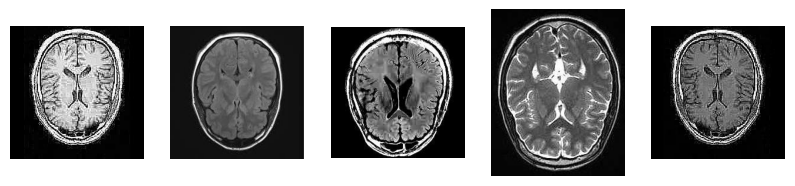

In [25]:
import cv2
import matplotlib.pyplot as plt

# Set the directory paths
image_dir = '/content/drive/My Drive/CNN/archive (4)/'
no_tumor_dir = image_dir + 'no/'

# Load and display images from 'no_tumor_images' directory
print("Images of no tumor:")
plt.figure(figsize=(10, 5))
for i in range(5):  # Display the first 5 images
    image = cv2.imread(no_tumor_dir + no_tumor_images[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

# Images of yes Tumor

Images of yes tumor:


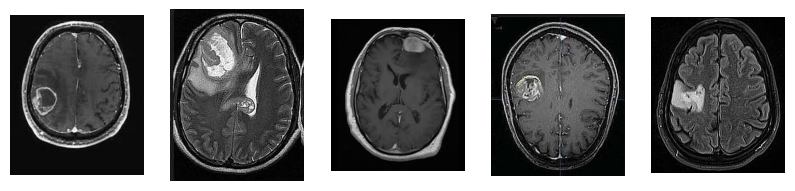

In [26]:
import cv2
import matplotlib.pyplot as plt

# Set the directory paths
image_dir = '/content/drive/My Drive/CNN/archive (4)/'
yes_tumor_dir = image_dir + 'yes/'

# Load and display images from 'yes_tumor_images' directory
print("Images of yes tumor:")
plt.figure(figsize=(10, 5))
for i in range(5):  # Display the first 5 images
    image = cv2.imread(yes_tumor_dir + yes_tumor_images[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

## Creat an empty list for dataset and label

In [5]:
#creat an empty list for dataset and label
dataset=[]
label=[]

## Loop for **NO** Tumor image

In [6]:
# loop for reading no tumor images
for i, image_name in enumerate(no_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        # read the image using OpenCV
        image = cv2.imread(image_dir + 'no/' + image_name)

        # convert BGR image to RGB format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # resize the image
        image = cv2.resize(image, (128, 128))

        # append images as numpy array to dataset list
        dataset.append(np.array(image))

        # append 0 label list (label for no tumor)
        label.append(0)

## Loop for reading **YES** Tumor images

In [7]:
# loop for reading yes tumor images
for i, image_name in enumerate(yes_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        # read the image using OpenCV
        image = cv2.imread(image_dir + 'yes/' + image_name)

        # convert BGR image to RGB format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # resize the image
        image = cv2.resize(image, (128, 128))

        # append images as numpy array to dataset list
        dataset.append(np.array(image))

        # append 1 label list (label for yes tumor)
        label.append(1)

## Convert list to numpy array

In [8]:
dataset=np.array(dataset)
label = np.array(label)

print('Dataset: ',len(dataset))
print('Label: ',len(label))

Dataset:  3000
Label:  3000


## Split the data

In [9]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=.2)

## Normalize the dataset

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Convert dataset and label lists to numpy arrays
x_train_array = np.array(x_train)
x_test_array = np.array(x_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# Reshape x_train_array and x_test_array to flatten each image
x_train_flattened = x_train_array.reshape(x_train_array.shape[0], -1)
x_test_flattened = x_test_array.reshape(x_test_array.shape[0], -1)

# Normalize x_train_flattened and x_test_flattened along axis 1 (normalize each sample)
x_train_normalized = normalize(x_train_flattened, axis=1)
x_test_normalized = normalize(x_test_flattened, axis=1)


In [17]:
# Reshape the input data to its original shape
x_train_reshaped = x_train_array.reshape(-1, 128, 128, 3)
x_test_reshaped = x_test_array.reshape(-1, 128, 128, 3)

### Model Building/ Train and Evaluate the Model

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_reshaped, y_train_array, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test_array)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Epoch 1/5
60/60 [==============================] - 60s 990ms/step - loss: 12.6265 - accuracy: 0.7672 - val_loss: 0.3312 - val_accuracy: 0.8771
Epoch 2/5
60/60 [==============================] - 56s 941ms/step - loss: 0.1999 - accuracy: 0.9271 - val_loss: 0.2364 - val_accuracy: 0.9375
Epoch 3/5
60/60 [==============================] - 63s 1s/step - loss: 0.0943 - accuracy: 0.9729 - val_loss: 0.3496 - val_accuracy: 0.9250
Epoch 4/5
60/60 [==============================] - 59s 979ms/step - loss: 0.0513 - accuracy: 0.9849 - val_loss: 0.2595 - val_accuracy: 0.9604
Epoch 5/5
19/19 [==============================] - 5s 228ms/step - loss: 0.1312 - accuracy: 0.9667
Test Loss: 0.1311919242143631
Test Accuracy: 0.9666666388511658


Model has completed training for 5 epochs, achieving an accuracy of approximately 99.84% on the training data and 95.42% on the validation data. During evaluation on the test data, it achieved a test accuracy of approximately 96.67%.

## Confusion Matrix

19/19 [==============================] - 10s 539ms/step


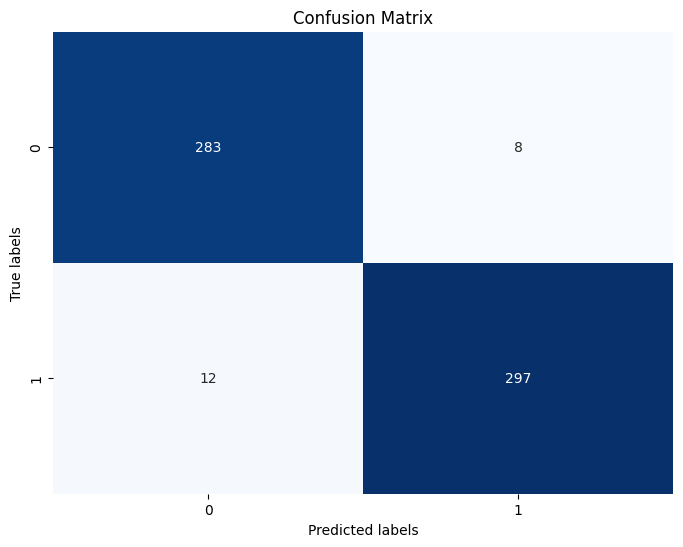

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for test data
y_pred = model.predict(x_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Compute confusion matrix
conf_mat = confusion_matrix(y_test_array, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Plot_Metrics(History)

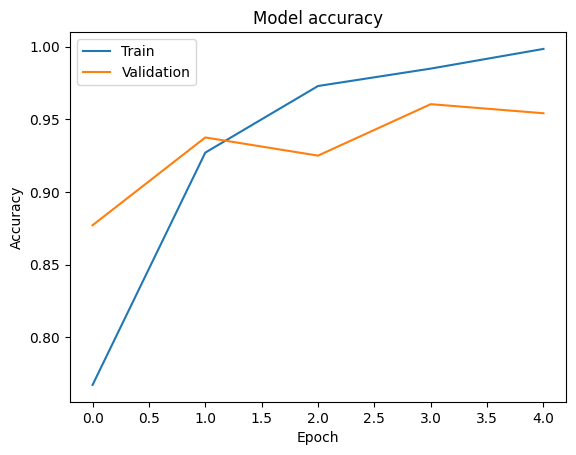

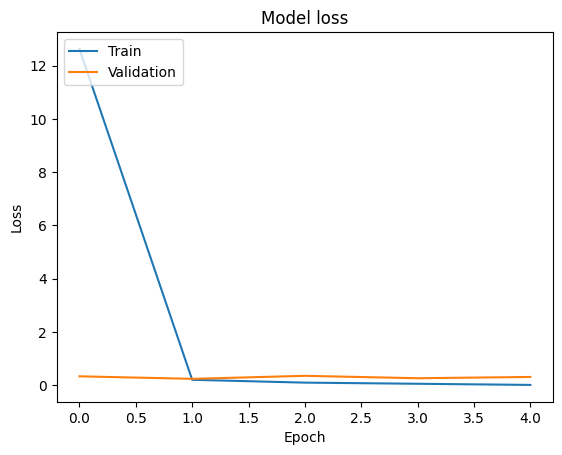

In [22]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call plot_metrics with the history object
plot_metrics(history)
